## Import necessary libraries



In [1]:
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from statsmodels.multivariate.manova import MANOVA
from pingouin import ancova, read_dataset
import pingouin as pg

### Reading Datases from pingoun library (This is also a library for statistical analysis)

In [2]:
df = read_dataset('ancova')
# Reading 5 random samples
# If you want samples to be same everytime specify random seed
np.random.seed(5) # Run this cell with this and without to notice the differences
df.sample(5)

,Scores,Income,BMI,Method
31,8,37.0,25,D
22,9,22.2,25,C
3,17,47.0,19,A
18,31,54.0,18,C
20,15,40.6,22,C


Here Income and BMI may be covariates of Scores so visualizing it's relationship

**ANCOVA assumes a linear relationship between the dependent variable and covariates.**

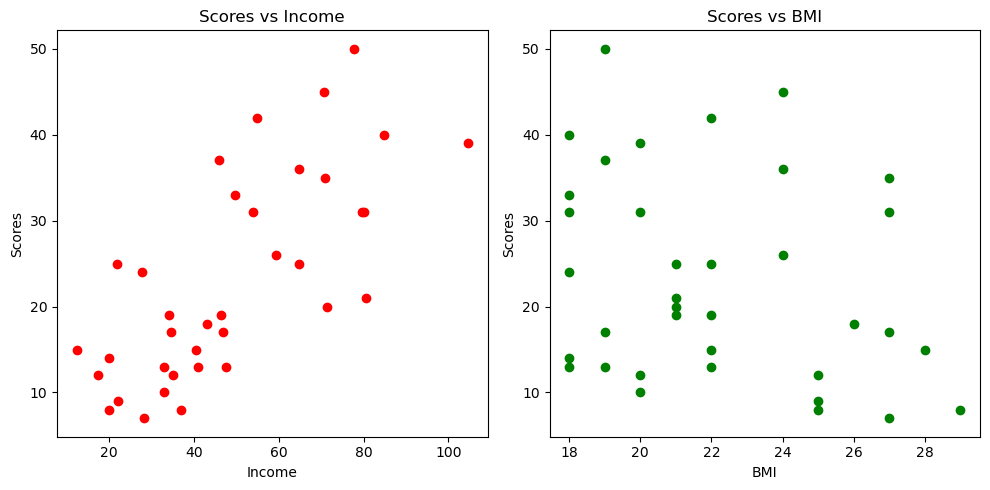

In [3]:
# Scatter plot for Scores vs Income
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(df['Income'], df['Scores'],c='r')
plt.title('Scores vs Income')
plt.xlabel('Income')
plt.ylabel('Scores')

# Scatter plot for Scores vs BMI
plt.subplot(1, 2, 2)
plt.scatter(df['BMI'], df['Scores'],c='g')
plt.title('Scores vs BMI')
plt.xlabel('BMI')
plt.ylabel('Scores')

plt.tight_layout()
plt.show()

If Covariates (Income and BMI) are highly correlated, multicollinearity might affect the interpretation of your results. So checking it's relationship

<Axes: >

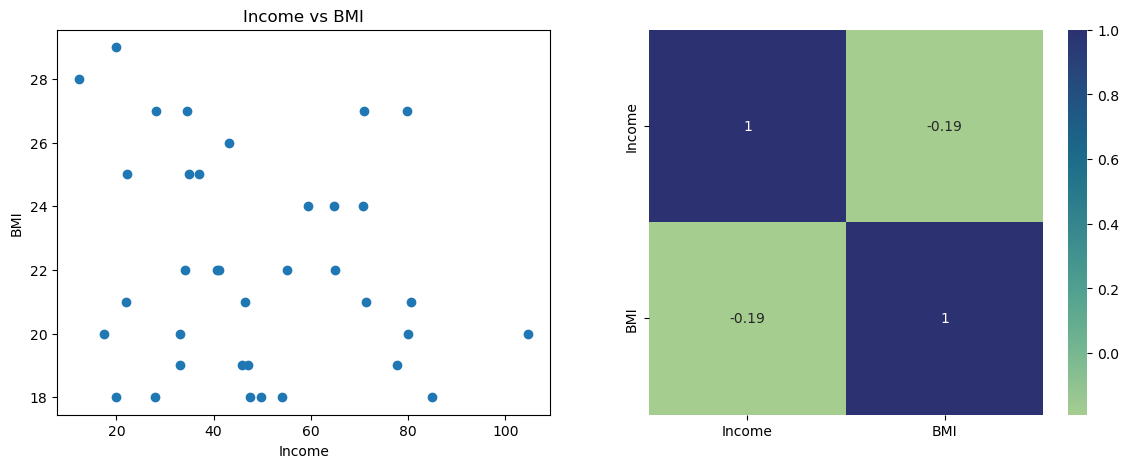

In [4]:
# Scatter plot for Income vs BMI
plt.figure(figsize=(14, 5))
plt.subplot(1,2,1)
plt.scatter(df["Income"], df["BMI"])
plt.title("Income vs BMI")
plt.xlabel("Income")
plt.ylabel("BMI")

# Correlation coefficient
correlation = df[["Income", "BMI"]].corr()
plt.subplot(1,2,2)
sns.heatmap(correlation, annot=True, cmap="crest")


In [5]:
model = smf.ols("Scores ~ C(Method)+ Income + BMI", data=df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     11.21
Date:                Sun, 19 Jan 2025   Prob (F-statistic):           3.70e-06
Time:                        21:54:38   Log-Likelihood:                -120.56
No. Observations:                  36   AIC:                             253.1
Df Residuals:                      30   BIC:                             262.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         18.2747     10.674      1.

### Checking for normal distribution and equal variance of residuals

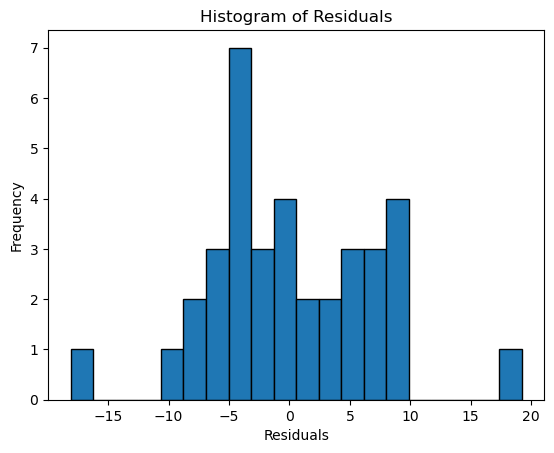

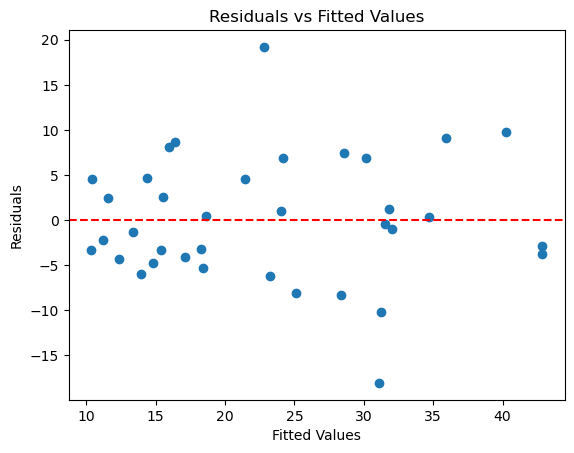

In [6]:
residuals = model.resid

# Histogram of residuals
plt.hist(residuals, bins=20, edgecolor='k')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plot residuals vs fitted values
fitted_values = model.fittedvalues
plt.scatter(fitted_values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


Residuals are normally distributed as well as have equal variance(approximately)

In [7]:
import statsmodels.formula.api as smf

# Fit the ANCOVA model with interaction terms
model = smf.ols('Scores ~ Income + BMI + Method + Income:Method + BMI:Method', data=df).fit()

# Display the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     5.001
Date:                Sun, 19 Jan 2025   Prob (F-statistic):           0.000483
Time:                        21:54:40   Log-Likelihood:                -118.08
No. Observations:                  36   AIC:                             260.2
Df Residuals:                      24   BIC:                             279.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             13.1575     19

#### As interaction term is not significant for Income:Method and BMI:Menthods so Homogenity of Regression Slopes assumption stands

### Alternatively you can use pingouin library for ancova

In [8]:
model = ancova(
    data=df,
    dv="Scores",
    covar=["Income", "BMI"],
    between="Method",
)
model

,Source,SS,DF,F,p-unc,np2
0,Method,552.284043,3,3.232550,0.036113,0.244288
1,Income,1573.952434,1,27.637304,0.000011,0.479504
2,BMI,60.013656,1,1.053790,0.312842,0.033934
3,Residual,1708.508657,30,NaN,NaN,NaN


# Generating Sample Data and Comparing 2 way anova, MANOVA and ANCOVA

In [9]:
# Just for generating the data

def generate_data():
    np.random.seed(42)
    
    # For One-Way ANOVA data 
    # Here we are taking samples from normal distribution (You guyz can try out for different other distributions as well and change the mean and variances)
    group_a = np.random.normal(50, 10, 30)
    group_b = np.random.normal(55, 10, 30)
    group_c = np.random.normal(60, 10, 30)
    anova_data = pd.DataFrame({
        'score': np.concatenate([group_a, group_b, group_c]),
        'group': ['A'] * 30 + ['B'] * 30 + ['C'] * 30
    })

    # Similarty Two-Way ANOVA data
    two_way_data = pd.DataFrame({
        'score': np.random.normal(50, 10, 100),
        'factor_1': np.random.choice(['Low', 'High'], size=100),
        'factor_2': np.random.choice(['Male', 'Female'], size=100)
    })

    # Similarty for Multivariate ANOVA MANOVA data
    manova_data = pd.DataFrame({
        'dependent_1': np.random.normal(50, 10, 50),
        'dependent_2': np.random.normal(60, 15, 50),
        'group': np.random.choice(['Control', 'Treatment'], size=50)
    })

    # ANCOVA data
    ancova_data = pd.DataFrame({
        'dependent': np.random.normal(50, 10, 100),
        'independent': np.random.choice(['A', 'B'], size=100),
        'covariate': np.random.normal(5, 2, 100)
    })

    return anova_data, two_way_data, manova_data, ancova_data

anova_data, two_way_data, manova_data, ancova_data = generate_data()

In [10]:
print("-" * 75)
print("For 1 way Anova: \n", anova_data.sample(5))
print("-" * 75)
print("For 2way Anova: \n", two_way_data.head())
print("-" * 75)
print("For Manova: \n", manova_data.head())
print("-" * 75)
print("For Ancova: \n", ancova_data.head())

---------------------------------------------------------------------------
For 1 way Anova: 
         score group
74  33.802549     C
9   55.425600     A
77  57.009926     C
87  63.287511     C
75  68.219025     C
---------------------------------------------------------------------------
For 2way Anova: 
        score factor_1 factor_2
0  50.970775      Low     Male
1  59.686450      Low     Male
2  42.979469     High     Male
3  46.723379      Low   Female
4  46.078918     High   Female
---------------------------------------------------------------------------
For Manova: 
    dependent_1  dependent_2      group
0    40.184913    44.909739    Control
1    54.621035    41.787171    Control
2    51.990597    77.371663    Control
3    43.997831    71.874940  Treatment
4    50.698021    69.361797  Treatment
---------------------------------------------------------------------------
For Ancova: 
    dependent independent  covariate
0  57.419630           A   3.870886
1  64.766586       

### 1 way ANOVA

In [11]:
def one_way_anova(data):
    print("One-Way ANOVA")
    model = ols('score ~ C(group)', data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    # print(anova_table)

    # Diagnostics
    residuals = model.resid

    # Normality check
    stat, p = shapiro(residuals)
    print(f"Shapiro-Wilk Test p-value: {p}")
    
    if p < 0.05:
        print("Residuals are not normally distributed. Consider transformations.")

    # Homogeneity of variance check
    stat, p = levene(data[data['group'] == 'A']['score'],
                     data[data['group'] == 'B']['score'],
                     data[data['group'] == 'C']['score'])
    print(f"Levene's Test p-value: {p}")

    if p < 0.05:
        print("Variance is not equal across groups. Consider transformations.")

    return anova_table

# Run One-Way ANOVA
one_way_anova(anova_data)

One-Way ANOVA
Shapiro-Wilk Test p-value: 0.8948287800633854
Levene's Test p-value: 0.8626638812717601


,sum_sq,df,F,PR(>F)
C(group),2165.964313,2.0,12.209526,0.000021
Residual,7716.880356,87.0,NaN,NaN


### For 2 way ANOVA

In [12]:
def two_way_anova(data):
    print("Two-Way ANOVA")
    
    # Fit an OLS model with interaction between two factors
    model = ols('score ~ C(factor_1) * C(factor_2)', data=data).fit()
    
    # Perform ANOVA and print the table
    anova_table = sm.stats.anova_lm(model, typ=2)
    # print(anova_table)

    # Diagnostics: Residuals analysis
    residuals = model.resid
    stat, p = shapiro(residuals)
    print(f"Shapiro-Wilk Test p-value: {p}")
    if p < 0.05:
        print("Residuals are not normally distributed. Consider transformations.")

    # Homogeneity of variance: Levene's test
    stat, p = levene(data[data['factor_1'] == 'Low']['score'],
                     data[data['factor_1'] == 'High']['score'])
    print(f"Levene's Test p-value: {p}")
    if p < 0.05:
        print("Variance is not equal across factors. Consider transformations.")

    return anova_table

# Run Two-Way ANOVA
two_way_anova(two_way_data)

Two-Way ANOVA
Shapiro-Wilk Test p-value: 0.1374746472398659
Levene's Test p-value: 0.15256312784582918


,sum_sq,df,F,PR(>F)
C(factor_1),0.146761,1.0,0.001581,0.968369
C(factor_2),0.786457,1.0,0.008471,0.926861
C(factor_1):C(factor_2),10.957857,1.0,0.118022,0.731941
Residual,8913.171845,96.0,NaN,NaN


### This is for MANOVA (not in the scope of this course but feel free to explore)

In [14]:
def manova(data):
    print("MANOVA")
    
    # Fit MANOVA model with multiple dependent variables
    manova_model = MANOVA.from_formula('dependent_1 + dependent_2 ~ group', data=data)
    
    # Print MANOVA test results
    print(manova_model.mv_test())

    # Assumptions: Multivariate normality
    dependent_vars = data[['dependent_1', 'dependent_2']]
    stat, p = shapiro(dependent_vars)
    print(f"Shapiro-Wilk Test for Multivariate Normality p-value: {p}")
    if p < 0.05:
        print("Dependent variables are not multivariate normal.")

    # Homogeneity of covariance matrices: Box's M test
    box_m_result = pg.box_m(data,['dependent_1', 'dependent_2'], 'group')
    print(box_m_result)
    print(f"Box's M Test p-value: {box_m_result.pval}")
    if box_m_result.pval[0] < 0.05:
        print("Covariance matrices are not equal. Consider transformations.")
    # return box_m_result
# Run MANOVA
manova(manova_data)

# 4. ANCOVA

MANOVA
                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept         Value  Num DF  Den DF F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda  0.0349 2.0000 47.0000 649.7714 0.0000
         Pillai's trace  0.9651 2.0000 47.0000 649.7714 0.0000
 Hotelling-Lawley trace 27.6498 2.0000 47.0000 649.7714 0.0000
    Roy's greatest root 27.6498 2.0000 47.0000 649.7714 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
           group          Value  Num DF  Den DF F Value Pr > F
--------------------------------------------------------------
            Wilks' lambda 0.9284 2.0000 47.0000  1.8127 0.1744
           Pillai's trace 0.0716 2.0000 47.0000  1.8127 0.1744
   H

/tmp/ipykernel_23418/2078749202.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if box_m_result.pval[0] < 0.05:


### For Ancova

In [15]:
# Function to perform ANCOVA and check assumptions
def ancova(data):
    print("ANCOVA")
    
    # Fit an OLS model with group and covariate as predictors
    model = ols('dependent ~ C(independent) + covariate', data=data).fit()
    
    # Perform ANCOVA and print the table
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(anova_table)

    # Check for homogeneity of regression slopes by testing interaction
    interaction_model = ols('dependent ~ C(independent) * covariate', data=data).fit()
    interaction_table = sm.stats.anova_lm(interaction_model, typ=2)
    print("Interaction Table:")
    print(interaction_table)

    # Diagnostics: Residual analysis
    residuals = model.resid
    stat, p = shapiro(residuals)
    print(f"Shapiro-Wilk Test p-value: {p}")
    if p < 0.05:
        print("Residuals are not normally distributed. Consider transformations.")

# Run ANCOVA
ancova(ancova_data)


ANCOVA
                      sum_sq    df         F    PR(>F)
C(independent)      5.512417   1.0  0.052725  0.818872
covariate         105.978720   1.0  1.013653  0.316534
Residual        10141.477880  97.0       NaN       NaN
Interaction Table:
                                sum_sq    df         F    PR(>F)
C(independent)                5.512417   1.0  0.052225  0.819721
covariate                   105.978720   1.0  1.004055  0.318850
C(independent):covariate      8.612232   1.0  0.081593  0.775765
Residual                  10132.865647  96.0       NaN       NaN
Shapiro-Wilk Test p-value: 0.8003436936226311
